In [1]:
# bivariate normal pdf and gradient of bivariate normal pdf surface plot

In [3]:
import numpy as np

import pandas as pd

import seaborn as sns 


from matplotlib import pyplot as plt


from scipy.interpolate import interp1d

from scipy.stats import skew, kurtosis

from scipy.integrate import quad, simpson


import langchain

import openai

import torch

In [9]:
# associated function definition

def bivariate_normal_pdf(x_vector : np.ndarray, mean_vector : np.ndarray, covariance_matrix: np.ndarray):
    
        coefficient = (np.sqrt(np.linalg.det(covariance_matrix)) * (2*np.pi)**(len(x_vector)/2))**(-1) 
    
    
        function = np.exp(-.5 * ((x_vector - mean_vector).T @ (np.linalg.inv(covariance_matrix)) @ (x_vector - mean_vector))) 
    
    
        return coefficient * function



def bivariate_normal_gradient(x_vector : np.ndarray, mean_vector : np.ndarray, covariance_matrix : np.ndarray):
    
    coefficient = -1*np.linalg.inv(covariance_matrix)*(x_vector - mean_vector)
    
    return bivariate_normal_pdf(x_vector, mean_vector, covariance_matrix) * coefficient    
    
    
    
def bivariate_normal_gradient_norm(x_vector : np.ndarray, mean_vector: np.ndarray, covariance_matrix: np.ndarray):
    
    return np.linalg.norm(bivariate_normal_gradient(x_vector, mean_vector, covariance_matrix))


    

In [81]:
# setting the PDF parameters 

x1_mean = 0

x2_mean = 0

x1_variance = 1

x2_variance = 1

x1_x2_covariance = 0



mean_vector1 = np.array([x1_mean, x2_mean])

covariance_matrix1 = np.array([[x1_variance,x1_x2_covariance],[x1_x2_covariance, x2_variance]])

In [95]:
# generating data for the surface plot

x1_array = np.linspace(-5,5, 100)

x2_array = np.linspace(-5,5, 100)

vector_grid = []



# manually creating a meshgrid

for x1_value in x1_array:
    
    for x2_value in x2_array:
        
        vector_grid.append([x1_value, x2_value])
        
        
        
vector_grid = np.array(vector_grid)




X, Y = np.meshgrid(x1_array, x2_array)

pdf_grid = []

gradient_grid = []

for vector in vector_grid:
    
    pdf_grid.append(bivariate_normal_pdf(x_vector = vector, mean_vector= mean_vector1, covariance_matrix = covariance_matrix1))
    
    gradient_grid.append(bivariate_normal_gradient_norm(x_vector = vector, mean_vector= mean_vector1, covariance_matrix = covariance_matrix1))


    
pdf_grid = np.array(pdf_grid)

gradient_grid = np.array(gradient_grid)

pdf_grid = pdf_grid.reshape(len(x1_array), len(x2_array))

gradient_grid = gradient_grid.reshape(len(x1_array), len(x2_array))


    

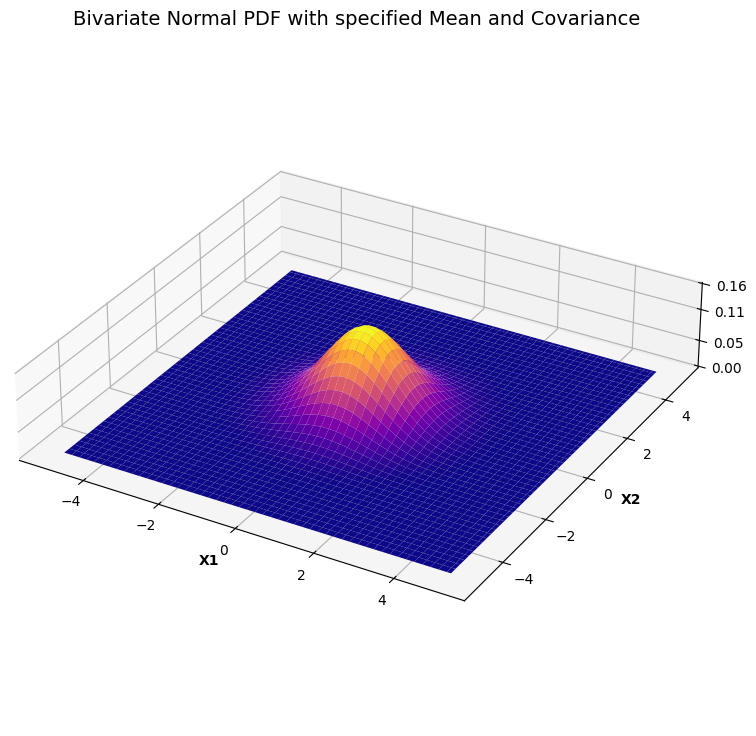

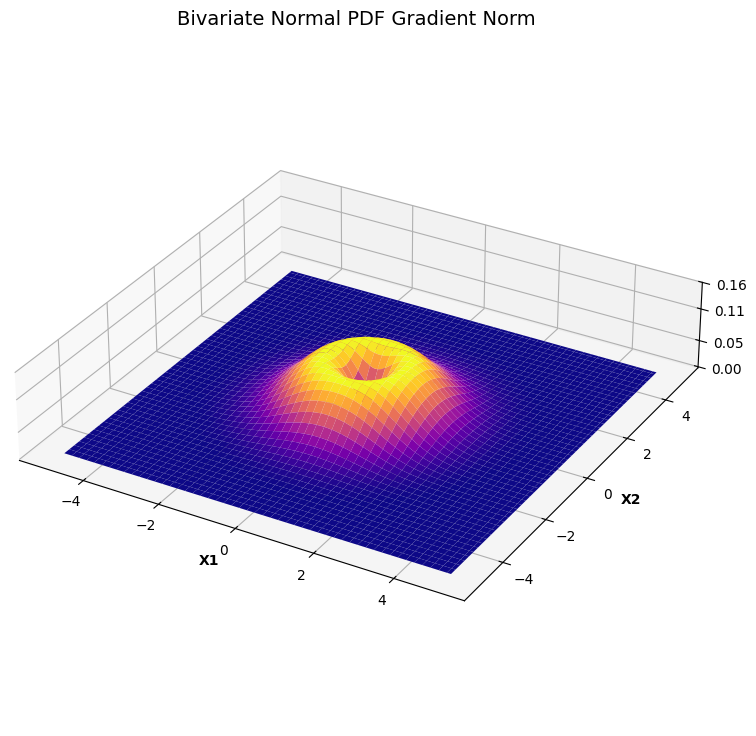

In [107]:
# generating a surface plot 


fig1= plt.figure(figsize = (9,9))

axs1 = plt.axes(projection = '3d')


axs1.set_xlabel('X1', fontdict = {'fontweight' : 'bold'})

axs1.set_ylabel('X2', fontdict = {'fontweight' : 'bold'})


axs1.set_title('Bivariate Normal PDF with specified Mean and Covariance', fontdict= {'fontsize' :14})

axs1.plot_surface(X, Y, pdf_grid, cmap = 'plasma')


axs1.set_box_aspect([5,5,1])

axs1.set_zticks(ticks = np.round(np.linspace(0,.16,4),2))


fig2= plt.figure(figsize = (9,9))

axs2 = plt.axes(projection = '3d')


axs2.set_xlabel('X1', fontdict = {'fontweight' : 'bold'})

axs2.set_ylabel('X2', fontdict = {'fontweight' : 'bold'})


axs2.set_title('Bivariate Normal PDF Gradient Norm', fontdict= {'fontsize' :14})

axs2.plot_surface(X, Y, gradient_grid, cmap = 'plasma')

axs2.set_zticks(ticks = np.round(np.linspace(0,.16,4),2))

axs2.set_box_aspect([5,5,1])



plt.show()